# 생선 분류

- 수산물 전문 물류센터에서 신입 직원들이 생선 이름을 외우지 못해 작업의 효율성이 현저히 떨어지는 일이 잦음

- 이 물류 센터에서는 주로 생선의 **길이와 무게**로 생선을 분류함

- 판매하는 생선은 도미, 잉어, 대구, 첨돔, 농어, 민물꼬치고기, 빙어

# 이진 분류(binary classification)

- 분류(classification) : 여러 개의 범주(클래스) 중 하나를 구별해 내는 것

- 이진 분류 : 2개의 범주 중 하나를 고르는 분류
    - 도미인가 방어인가

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # 전처리 기능모두
from sklearn.neighbors import KNeighborsClassifier # 이웃알고리즘모~두 (KNN 알고리즘을 이용한 분류기)

## 데이터 준비


In [5]:
df = pd.read_csv("./data/Fish.csv")

In [8]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
# Length1 : 어디까지 자르고 재는가

In [10]:
df.shape

(159, 7)

In [11]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [14]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# 이번 예제에서는 도미와 빙어에 대한 데이터 중, 

In [15]:
df = df.loc[df["Species"].isin(["Bream", "Smelt"]), ["Species","Weight","Length2"]]

In [17]:
df.shape

(49, 3)

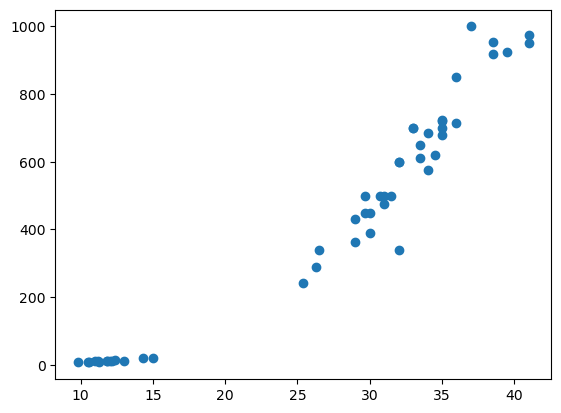

In [18]:
plt.figure()
plt.scatter(data = df, x = "Length2", y ="Weight")
plt.show()

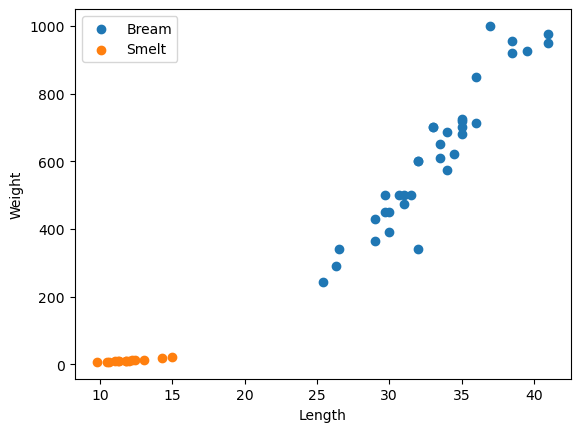

In [21]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"],group["Weight"], label = name)


plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

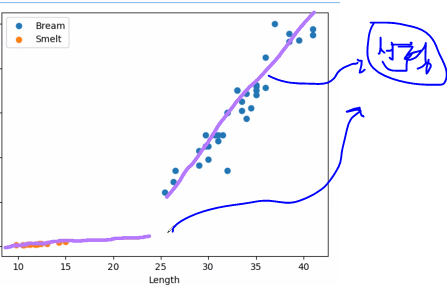

- 도미의 길이가 길수록 무게가 무거어지는 경향이 있음

- 빙어는 상대적으로 무게가 영향을 덜 받는 것처럼 보이지만 데이터의 분포가 일직선에 가까워 선형적임

### 레이블 인코딩

- 컴퓨터는 문자의 의미를 직접 이해하지 못함

- 따라서 도미와 방어를 숫자 0과 1로 표현

In [23]:
le = LabelEncoder() # 범주형의 데이터를 숫자로 바꿔줌

In [26]:
# 어떤 범주가 있는지 알아야함 

In [28]:
# fit_transform () fit 하고 바로변환
df["label"] = le.fit_transform(df["Species"])

In [29]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [30]:
df["label"].unique()

array([0, 1])

In [31]:
df["Species"].value_counts()

Species
Bream    35
Smelt    14
Name: count, dtype: int64

In [32]:
df["label"].value_counts()

label
0    35
1    14
Name: count, dtype: int64

In [34]:
# 인코딩 클래스 확인
le.classes_ # Bream 이 0 으로 Smelt 가 1로 치환되었다

array(['Bream', 'Smelt'], dtype=object)

In [38]:
# 치환할수있다 도미랑 빙어 자리
le.inverse_transform(df["label"])

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

## 모델 훈련

<img src="./image/KNN.png">

- K-Nearest Neighbor
    - 기존 데이터 중 가장 유사한 K개의 데이터를 이용해서 새로운 데이터를 예측
 
    - 특징
        - 최고 인접 다수결
            - 기존 데이터 중 가장 유사한 K개의 데이터를 측정하여 분류
         
        - Lazy Learning 기법
            - 새로운 입력값이 들어온 후 분류시작
            - 데이터셋을 저장만 하고 일반화된 모델을 능동적으로 만들지 않음
              
        - 단순 유연성
            - ***모형이 단순하며 파라미터의 가정이 거의 없음***
         
    - 장점
        - 학습이 간단!
        - 훈련데이터의 크기가 클수록 정확
        - 모형 단순 쉽게 구현
    - 단점
        - k값 선정에 따라 성능이 좌우됨
        - 높은 자원 요구량
            - 데이터셋 전체를 메모리에 기억
         
        - 계산 복잡성
            - 모든 데이터와의 거리 측정 수행이 필요(모두모두 피타고라스써야함)

In [40]:
# 모델 객체 생성
knn  = KNeighborsClassifier(n_neighbors = 5) # n_neighbors 이게 K 임
# 일반적으로 짝수를 안넣음
# 

In [41]:
# 모델 학습
                        # 독립변수, 종속변수
knn.fit(df[["Length2","Weight"]], df["label"])
# knn 에 정보가 들어감

KNeighborsClassifier()

## 모델 평가

In [43]:
# 정확도가 나옴 1.0 
knn.score(df[["Length2","Weight"]], df["label"])
# 독립변수 => 예측값, 종속변수 => 정답값
# 그 둘을 비교한다
# 1.0 100% 잘 예측을 하고 있다.

1.0

In [49]:
knn.predict(df[["Length2","Weight"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [50]:
# 평가지표를 정하고 들어가야함
# 어떠한 값이 기준값보다 작으면 패널티를 크게 부여함

# 정확히 맞힌 데이터 수 / 전체 데이터 수 =  정확도

- 정확도
    - 정확한 답을 몇 개 맞혔는지를 백분율로 나타낸 값
    - 0~1 사이의 값으로 출력
    - 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

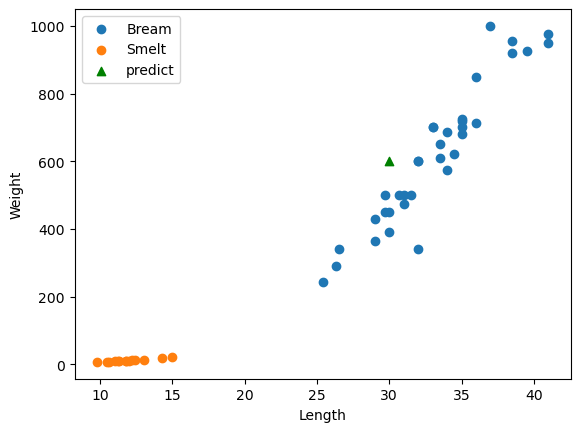

In [51]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"],group["Weight"], label = name)

# 30센티 무게 600
plt.scatter(30, 600, c="g", marker = "^", label="predict")
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [52]:
# 길이 30, 무게 600 짜리 물고기에 대한 예측
knn.predict([[30, 600]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# 예측값 0

In [54]:
le.inverse_transform([0])

array(['Bream'], dtype=object)

In [55]:
# Bream 도미래~~~~

In [56]:
# 정확도 높이기 게임이라고 생각하지 말어라~~~~

In [57]:
# 예측을 하기위해서 정확도를 높이는거죵

In [58]:
# 학습용데이터와 테스트데이터가 똑같아서...

- 모든 데이터로 학습을 하면 정답을 잘 맞히는 것이 당연하기 때문에 일반화 할 수 있는 좋은 모델인지 평가할 평가지표가 없음